# 피마 인디언 당뇨병 (Pima Indians Diabetes Dataset)
---

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import myutils as my

### 데이터 준비

In [66]:
# !gdown https://raw.githubusercontent.com/devdio/datasets/main/diabetes.csv

In [67]:
diabetes = pd.read_csv('diabetes.csv')
diabetes.shape

(768, 9)

In [68]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [69]:
diabetes['Pregnancies'].unique()

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14],
      dtype=int64)

In [70]:
diabetes['Pregnancies'].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

### 이상치 확인

In [71]:
def iszero(x):
    return x == 0

In [72]:
diabetes.apply(iszero)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,True,False,False,False,False
1,False,False,False,False,True,False,False,False,True
2,False,False,False,True,True,False,False,False,False
3,False,False,False,False,False,False,False,False,True
4,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,True
764,False,False,False,False,True,False,False,False,True
765,False,False,False,False,False,False,False,False,True
766,False,False,False,True,True,False,False,False,False


In [73]:
diabetes.apply(iszero).sum(axis=0)

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [74]:
df = diabetes.copy()

In [75]:
df.loc[df['Glucose']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [76]:
# df['Glucose'].replace(0, np.nan, inplace=True) 이상치값 0을 결측치값 nan으로 바꿔준다.

In [77]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [78]:
for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI']:
    df[col].replace(0, np.nan, inplace=True)

In [79]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [80]:
for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI']:
    df[col].fillna(df[col].mean(), inplace=True)

In [81]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


In [82]:
df.isna().sum(axis=0)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [83]:
x = df.drop(['Outcome'], axis = 1)
y = df['Outcome']

In [84]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y)# 당뇨병인것과 아닌것의 값 차이가 많이 나면 stratify를 써서 골고루 분배해줌
print(x_train.shape, y_train.shape)

(614, 8) (614,)


In [85]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
y_train = y_train.values

In [86]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression()
lg.fit(x_train, y_train)

LogisticRegression()

In [87]:
lg.score(x_train, y_train) # R2 값, 1에 가까울수록 좋다

0.7899022801302932

### 테스트

In [88]:
x_test = scaler.fit_transform(x_test)
y_test = y_test.values

In [89]:
y_pred = lg.predict(x_test)

In [90]:
y_pred

array([0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1],
      dtype=int64)

In [98]:
y_pred = lg.predict_proba(x_test) # 확률을 예측한다 # y의 값이 0.5보다 크면 1로 판단하고, 보다 작으면 0으로 판단한다.
y_pred[:10]

array([[0.87295678, 0.12704322],
       [0.80932729, 0.19067271],
       [0.88645381, 0.11354619],
       [0.0674595 , 0.9325405 ],
       [0.39070358, 0.60929642],
       [0.86096715, 0.13903285],
       [0.94455739, 0.05544261],
       [0.29880163, 0.70119837],
       [0.86798021, 0.13201979],
       [0.29201976, 0.70798024]])

In [102]:
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1],
      dtype=int64)

In [103]:
my.print_score(y_test, y_pred)

accuraccy: 0.6883116883116883
precision: 0.5833333333333334
recall: 0.3888888888888889


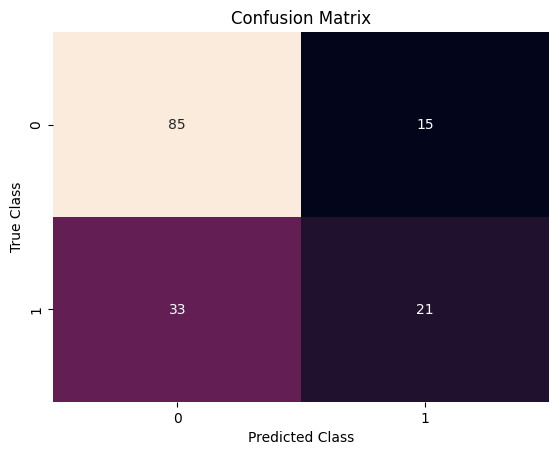

In [104]:
my.plot_confusion_matrix(y_test, y_pred)